In [1]:
import sys
sys.path.append('../')  # Ajustez le chemin selon la structure de votre dossier


In [2]:
from torch.utils.data import DataLoader
from src.utils.dataset import CustomCocoDetection
from src.utils.transforms import get_object_detection_transform, get_basic_transform
from torchvision import datasets
from src.utils.helper import plot

data_dir = '../data'
phase = 'train'
root = f'{data_dir}/{phase}/images'
annotation = f'{data_dir}/{phase}/{phase}.json'

# Création de l'instance dataset
dataset = CustomCocoDetection(root, annotation, transforms=get_basic_transform())
dataset = datasets.wrap_dataset_for_transforms_v2(dataset, target_keys=["boxes", "labels"])

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


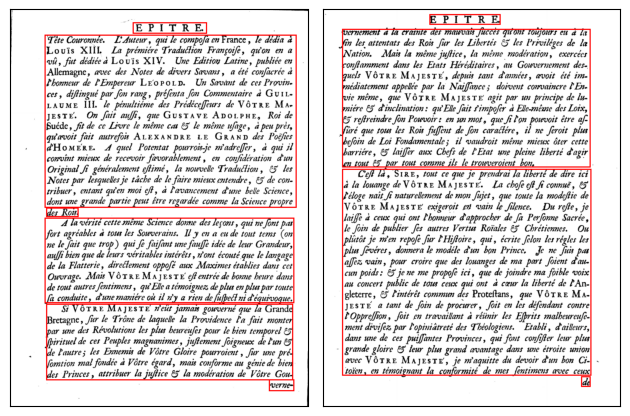

In [3]:
plot([dataset[0],dataset[1]])

In [4]:
from src.utils.dataloader import create_dataloader
data_loader = create_dataloader(data_dir, 'train', batch_size=4, num_workers=4, shuffle=True)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [5]:
img, target = next(iter(data_loader))

In [6]:
for images, targets in data_loader:
    print(images.shape)
    print(targets)
    break

torch.Size([4, 3, 1024, 768])
[{'boxes': BoundingBoxes([[316.2409,  34.3881, 507.8457,  63.0448],
               [ 89.2915,  66.8657, 738.5155, 512.0000],
               [ 93.0120, 512.0000, 176.7229, 536.8358],
               [ 89.2915, 538.7463, 732.9348, 758.4478],
               [ 93.0120, 760.3582, 729.2143, 957.1343],
               [667.8264, 955.2239, 732.9348, 985.7910]], format=BoundingBoxFormat.XYXY, canvas_size=(1024, 768)), 'labels': tensor([0, 1, 1, 1, 1, 1])}, {'boxes': BoundingBoxes([[109.6479,  45.8507, 595.9892,  70.6866],
               [608.3688,  47.7612, 641.9705,  72.5970],
               [641.9705,  76.4179, 726.8593, 124.1791],
               [ 77.8146,  72.5970, 640.2020, 357.2537],
               [ 77.8146, 359.1642, 640.2020, 462.3284],
               [ 83.1202, 479.5224, 355.4713, 576.9552],
               [ 81.3516, 576.9552, 353.7028, 613.2537],
               [367.8509, 479.5224, 641.9705, 552.1194],
               [366.0824, 554.0298, 640.2020, 611.3433

In [7]:
from src.data.data_module import GrotiusDataModule

data_module = GrotiusDataModule(data_dir, batch_size=4, num_workers=4)

In [8]:
data_module.setup()

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [9]:
train = data_module.train_dataloader()
val = data_module.val_dataloader()
test = data_module.test_dataloader()

In [10]:
for images, targets in test:
    print(images.shape)
    print(targets)
    break

torch.Size([4, 3, 1024, 768])
[[{'id': 2022, 'image_id': 146, 'category_id': 2, 'segmentation': [], 'bbox': [419.955223880597, 164.44029850746267, 369.35820895522374, 32.888059701492544], 'ignore': 0, 'iscrowd': 0, 'area': 12147.474827355756}, {'id': 2023, 'image_id': 146, 'category_id': 1, 'segmentation': [], 'bbox': [278.2835820895523, 60.71641791044775, 624.8731343283581, 32.888059701492544], 'ignore': 0, 'iscrowd': 0, 'area': 20550.86494764981}, {'id': 2024, 'image_id': 146, 'category_id': 1, 'segmentation': [], 'bbox': [189.73880597014923, 70.83582089552239, 48.06716417910446, 22.76865671641792], 'ignore': 0, 'iscrowd': 0, 'area': 1094.4247605257297}, {'id': 2025, 'image_id': 146, 'category_id': 1, 'segmentation': [], 'bbox': [73.36567164179104, 263.1044776119403, 116.37313432835819, 258.04477611940297], 'ignore': 0, 'iscrowd': 0, 'area': 30029.4793940744}, {'id': 2026, 'image_id': 146, 'category_id': 1, 'segmentation': [], 'bbox': [70.83582089552239, 118.90298507462688, 123.96268